# CTG Analysis #3: The effects of prompt class on response generation

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
from pdb import set_trace
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GLOBAL VARIABLES
PLOT_DIMS = (11.7, 8.27)
TITLE_SIZE = 30
LABEL_SIZE = 25
TICK_SIZE=20
CI=95
ERR_STYLE='bars'

In [3]:
# Create dataframes

#### gpt2_young
# initialize empty df
gpt2_young_df = pd.DataFrame(columns=['model', 'prompt_class', 'target_prob', 'ppl'])

# young prompt
gpt2_young_df = gpt2_young_df.append({'model' : 'baseline', 'prompt_class' : 'young', 'target_prob' : 0.80, 'ppl' : 28.05}, ignore_index=True)
gpt2_young_df = gpt2_young_df.append({'model' : 'bow', 'prompt_class' : 'young', 'target_prob' : 0.82, 'ppl' : 28.81}, ignore_index=True)
gpt2_young_df = gpt2_young_df.append({'model' : 'discrim', 'prompt_class' : 'young', 'target_prob' : 0.70, 'ppl' : 39.32}, ignore_index=True)

# neutral prompt
gpt2_young_df = gpt2_young_df.append({'model' : 'baseline', 'prompt_class' : 'neutral', 'target_prob' : 0.62, 'ppl' : 27.50}, ignore_index=True)
gpt2_young_df = gpt2_young_df.append({'model' : 'bow', 'prompt_class' : 'neutral', 'target_prob' : 0.69, 'ppl' : 27.91}, ignore_index=True)
gpt2_young_df = gpt2_young_df.append({'model' : 'discrim', 'prompt_class' : 'neutral', 'target_prob' : 0.66, 'ppl' : 32.09}, ignore_index=True)

# old prompt
gpt2_young_df = gpt2_young_df.append({'model' : 'baseline', 'prompt_class' : 'old', 'target_prob' : 0.60, 'ppl' : 29.34}, ignore_index=True)
gpt2_young_df = gpt2_young_df.append({'model' : 'bow', 'prompt_class' : 'old', 'target_prob' : 0.62, 'ppl' : 29.61}, ignore_index=True)
gpt2_young_df = gpt2_young_df.append({'model' : 'discrim', 'prompt_class' : 'old', 'target_prob' : 0.65, 'ppl' : 32.34}, ignore_index=True)


#### gpt2_old
# initialize empty df
gpt2_old_df = pd.DataFrame(columns=['model', 'prompt_class', 'target_prob', 'ppl'])

# young prompt
gpt2_old_df = gpt2_old_df.append({'model' : 'baseline', 'prompt_class' : 'young', 'target_prob' : 0.20, 'ppl' : 28.05}, ignore_index=True)
gpt2_old_df = gpt2_old_df.append({'model' : 'bow', 'prompt_class' : 'young', 'target_prob' : 0.23, 'ppl' : 28.54}, ignore_index=True)
gpt2_old_df = gpt2_old_df.append({'model' : 'discrim', 'prompt_class' : 'young', 'target_prob' : 0.71, 'ppl' : 85.40}, ignore_index=True)

# neutral prompt
gpt2_old_df = gpt2_old_df.append({'model' : 'baseline', 'prompt_class' : 'neutral', 'target_prob' : 0.38, 'ppl' : 27.50}, ignore_index=True)
gpt2_old_df = gpt2_old_df.append({'model' : 'bow', 'prompt_class' : 'neutral', 'target_prob' : 0.42, 'ppl' : 27.58}, ignore_index=True)
gpt2_old_df = gpt2_old_df.append({'model' : 'discrim', 'prompt_class' : 'neutral', 'target_prob' : 0.76, 'ppl' : 47.15}, ignore_index=True)

# old prompt
gpt2_old_df = gpt2_old_df.append({'model' : 'baseline', 'prompt_class' : 'old', 'target_prob' : 0.40, 'ppl' : 29.34}, ignore_index=True)
gpt2_old_df = gpt2_old_df.append({'model' : 'bow', 'prompt_class' : 'old', 'target_prob' : 0.41, 'ppl' : 28.81}, ignore_index=True)
gpt2_old_df = gpt2_old_df.append({'model' : 'discrim', 'prompt_class' : 'old', 'target_prob' : 0.90, 'ppl' : 95.21}, ignore_index=True)

#### dgpt_young
# initialize empty df
dgpt_young_df = pd.DataFrame(columns=['model', 'prompt_class', 'target_prob', 'ppl'])

# young prompt
dgpt_young_df = dgpt_young_df.append({'model' : 'baseline', 'prompt_class' : 'young', 'target_prob' : 0.90, 'ppl' : 36.69}, ignore_index=True)
dgpt_young_df = dgpt_young_df.append({'model' : 'bow', 'prompt_class' : 'young', 'target_prob' : 0.91, 'ppl' : 37.87}, ignore_index=True)
dgpt_young_df = dgpt_young_df.append({'model' : 'discrim', 'prompt_class' : 'young', 'target_prob' : 0.89, 'ppl' : 39.22}, ignore_index=True)

# neutral prompt
dgpt_young_df = dgpt_young_df.append({'model' : 'baseline', 'prompt_class' : 'neutral', 'target_prob' : 0.76, 'ppl' : 37.52}, ignore_index=True)
dgpt_young_df = dgpt_young_df.append({'model' : 'bow', 'prompt_class' : 'neutral', 'target_prob' : 0.87, 'ppl' : 38.67}, ignore_index=True)
dgpt_young_df = dgpt_young_df.append({'model' : 'discrim', 'prompt_class' : 'neutral', 'target_prob' : 0.86, 'ppl' : 42.01}, ignore_index=True)

# old prompt
dgpt_young_df = dgpt_young_df.append({'model' : 'baseline', 'prompt_class' : 'old', 'target_prob' : 0.72, 'ppl' : 38.18}, ignore_index=True)
dgpt_young_df = dgpt_young_df.append({'model' : 'bow', 'prompt_class' : 'old', 'target_prob' : 0.81, 'ppl' : 38.66}, ignore_index=True)
dgpt_young_df = dgpt_young_df.append({'model' : 'discrim', 'prompt_class' : 'old', 'target_prob' : 0.84, 'ppl' : 42.93}, ignore_index=True)

#### dgpt_old
# initialize empty df
dgpt_old_df = pd.DataFrame(columns=['model', 'prompt_class', 'target_prob', 'ppl'])

# young prompt
dgpt_old_df = dgpt_old_df.append({'model' : 'baseline', 'prompt_class' : 'young', 'target_prob' : 0.10, 'ppl' : 36.69}, ignore_index=True)
dgpt_old_df = dgpt_old_df.append({'model' : 'bow', 'prompt_class' : 'young', 'target_prob' : 0.15, 'ppl' : 37.04}, ignore_index=True)
dgpt_old_df = dgpt_old_df.append({'model' : 'discrim', 'prompt_class' : 'young', 'target_prob' : 0.48, 'ppl' : 38.46}, ignore_index=True)

# neutral prompt
dgpt_old_df = dgpt_old_df.append({'model' : 'baseline', 'prompt_class' : 'neutral', 'target_prob' : 0.24, 'ppl' : 37.52}, ignore_index=True)
dgpt_old_df = dgpt_old_df.append({'model' : 'bow', 'prompt_class' : 'neutral', 'target_prob' : 0.22, 'ppl' : 37.91}, ignore_index=True)
dgpt_old_df = dgpt_old_df.append({'model' : 'discrim', 'prompt_class' : 'neutral', 'target_prob' : 0.57, 'ppl' : 41.17}, ignore_index=True)

# old prompt
dgpt_old_df = dgpt_old_df.append({'model' : 'baseline', 'prompt_class' : 'old', 'target_prob' : 0.28, 'ppl' : 38.18}, ignore_index=True)
dgpt_old_df = dgpt_old_df.append({'model' : 'bow', 'prompt_class' : 'old', 'target_prob' : 0.31, 'ppl' : 36.93}, ignore_index=True)
dgpt_old_df = dgpt_old_df.append({'model' : 'discrim', 'prompt_class' : 'old', 'target_prob' : 0.61, 'ppl' : 40.08}, ignore_index=True)

In [4]:
gpt2_young_df

,model,prompt_class,target_prob,ppl
0,baseline,young,0.80,28.05
1,bow,young,0.82,28.81
2,discrim,young,0.70,39.32
3,baseline,neutral,0.62,27.50
4,bow,neutral,0.69,27.91
5,discrim,neutral,0.66,32.09
6,baseline,old,0.60,29.34
7,bow,old,0.62,29.61
8,discrim,old,0.65,32.34


In [5]:
gpt2_old_df

,model,prompt_class,target_prob,ppl
0,baseline,young,0.20,28.05
1,bow,young,0.23,28.54
2,discrim,young,0.71,85.40
3,baseline,neutral,0.38,27.50
4,bow,neutral,0.42,27.58
5,discrim,neutral,0.76,47.15
6,baseline,old,0.40,29.34
7,bow,old,0.41,28.81
8,discrim,old,0.90,95.21


In [6]:
dgpt_young_df

,model,prompt_class,target_prob,ppl
0,baseline,young,0.90,36.69
1,bow,young,0.91,37.87
2,discrim,young,0.89,39.22
3,baseline,neutral,0.76,37.52
4,bow,neutral,0.87,38.67
5,discrim,neutral,0.86,42.01
6,baseline,old,0.72,38.18
7,bow,old,0.81,38.66
8,discrim,old,0.84,42.93


In [7]:
dgpt_old_df

,model,prompt_class,target_prob,ppl
0,baseline,young,0.10,36.69
1,bow,young,0.15,37.04
2,discrim,young,0.48,38.46
3,baseline,neutral,0.24,37.52
4,bow,neutral,0.22,37.91
5,discrim,neutral,0.57,41.17
6,baseline,old,0.28,38.18
7,bow,old,0.31,36.93
8,discrim,old,0.61,40.08


## Target prob plots

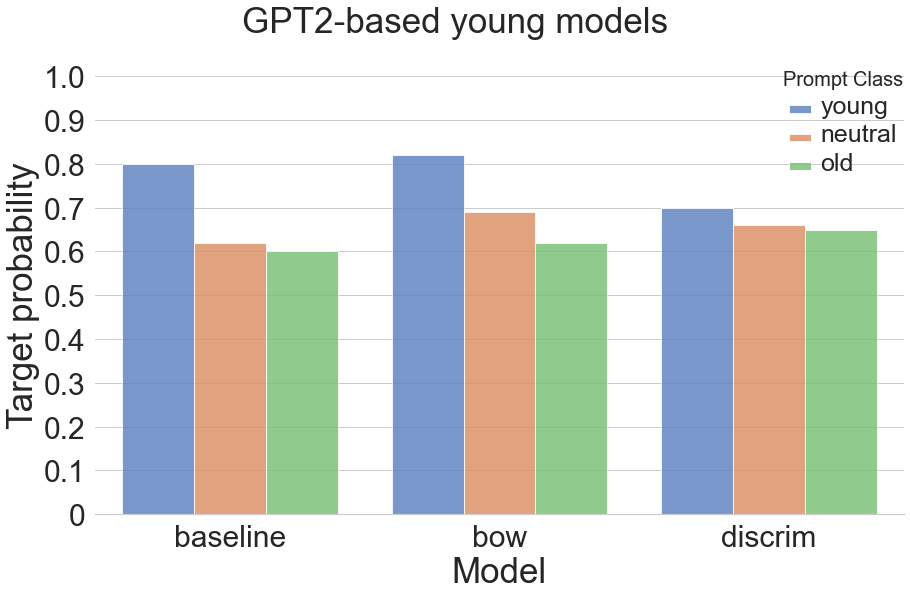

In [35]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=gpt2_young_df, kind="bar",
    x="model", y="target_prob", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Target probability", size=LABEL_SIZE + 10)
# g.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, 1.0))
# axes = g.axes
# axes[0,0].set_ylim(0,1.0)
# axes[0,1].set_ylim(0,)
# plt.ylim(0,1.0)

g.set(ylim=(0.0, 1.0), yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], size = TICK_SIZE + 10)

g.legend.set_title("Prompt Class")
# print(dir(g.legend))
g.legend.set_bbox_to_anchor((0.99, 0.795))
plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title

g.fig.suptitle("GPT2-based young models", size=TITLE_SIZE + 5, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_target_prob_gpt2_young_models.png")

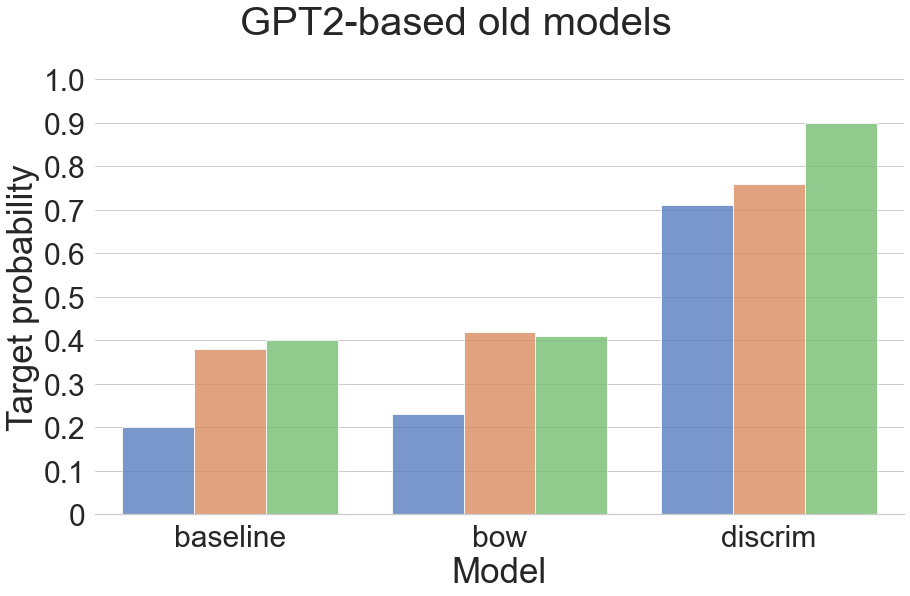

In [36]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=gpt2_old_df, kind="bar",
    x="model", y="target_prob", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Target probability", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, 1.0))


g.set(ylim=(0.0, 1.0), yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], size = TICK_SIZE + 10)

# g.legend.set_title("PPLM Model")
# # print(dir(g.legend))
# g.legend.set_bbox_to_anchor((1.15, 0.5))
# plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
# plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title
g._legend.remove()
g.fig.suptitle("GPT2-based old models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_target_prob_gpt2_old_models.png")

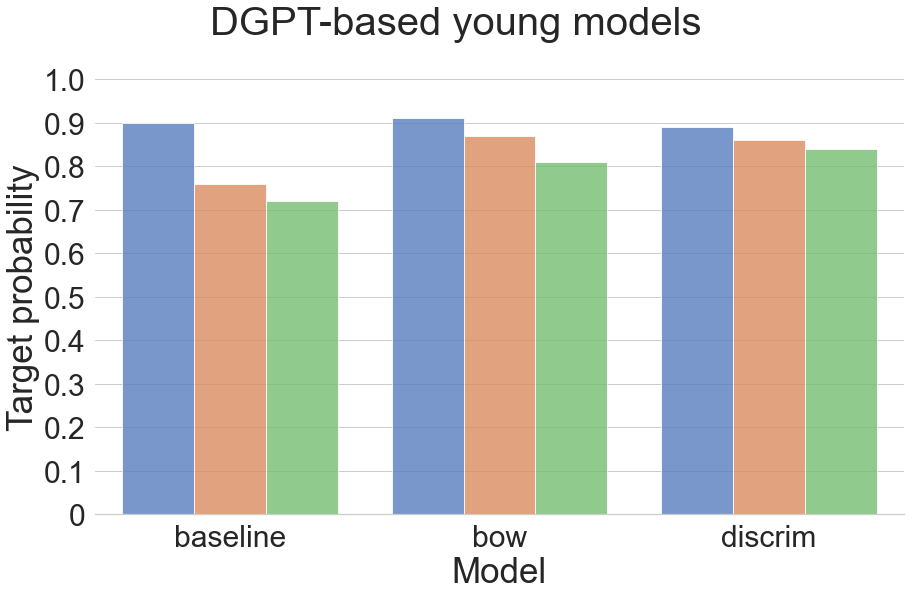

In [37]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=dgpt_young_df, kind="bar",
    x="model", y="target_prob", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Target probability", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, 1.0))


g.set(ylim=(0.0, 1.0), yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], size = TICK_SIZE + 10)

# g.legend.set_title("PPLM Model")
# # print(dir(g.legend))
# g.legend.set_bbox_to_anchor((1.15, 0.5))
# plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
# plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title
g._legend.remove()
g.fig.suptitle("DGPT-based young models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_target_prob_dgpt_young_models.png")

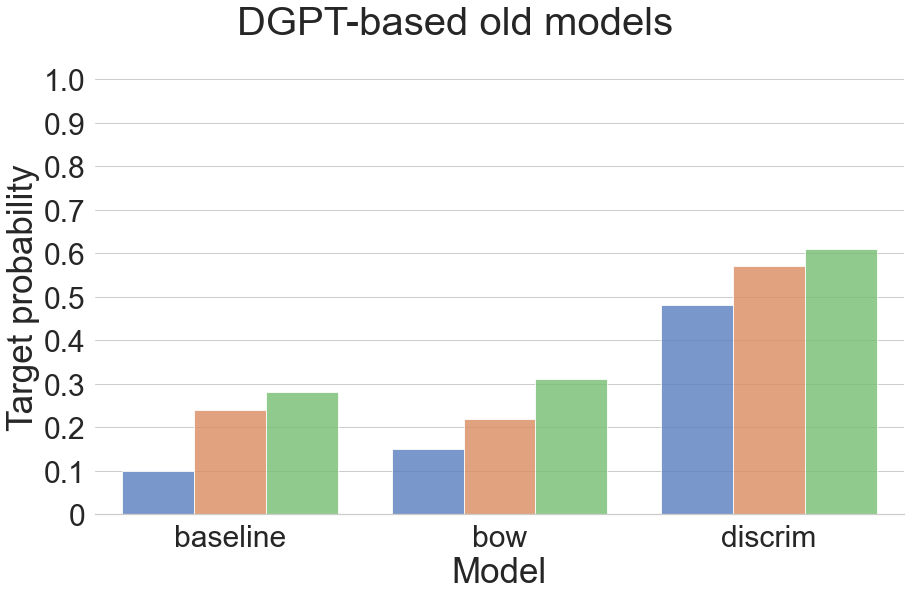

In [38]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=dgpt_old_df, kind="bar",
    x="model", y="target_prob", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Target probability", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, 1.0))


g.set(ylim=(0.0, 1.0), yticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], size = TICK_SIZE + 10)

# g.legend.set_title("PPLM Model")
# # print(dir(g.legend))
# g.legend.set_bbox_to_anchor((1.15, 0.5))
# plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
# plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title
g._legend.remove()
g.fig.suptitle("DGPT-based old models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_target_prob_dgpt_old_models.png")

### Perplexity plots

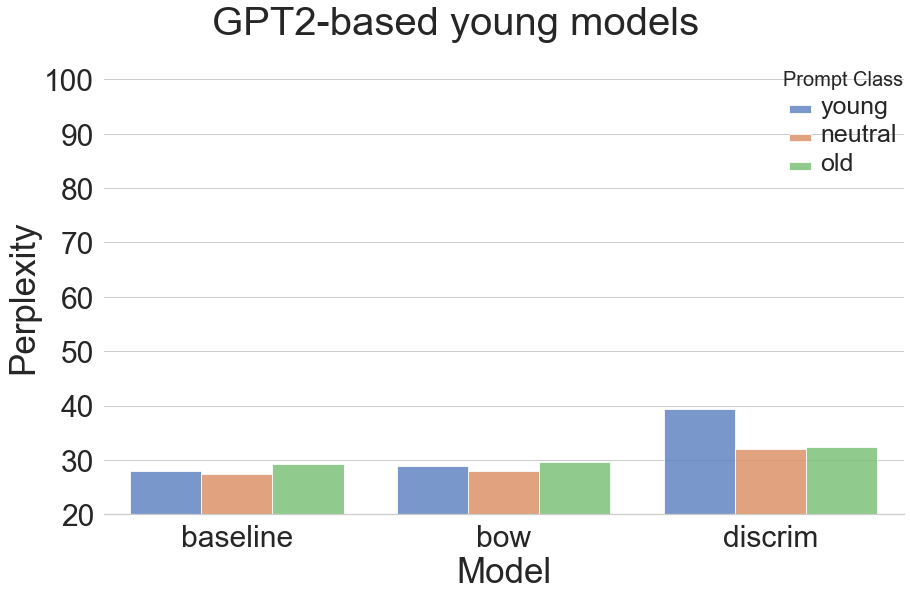

In [46]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=gpt2_young_df, kind="bar",
    x="model", y="ppl", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Perplexity", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, None))

g.set(ylim=(20, 100), yticks=[20, 30, 40, 50, 60, 70, 80, 90, 100])
g.set_yticklabels([20, 30, 40, 50, 60, 70, 80, 90, 100], size = TICK_SIZE + 10)

g.legend.set_title("Prompt Class")
# print(dir(g.legend))
g.legend.set_bbox_to_anchor((0.99, 0.795))
plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title

g.fig.suptitle("GPT2-based young models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_ppl_gpt2_young_models.png")

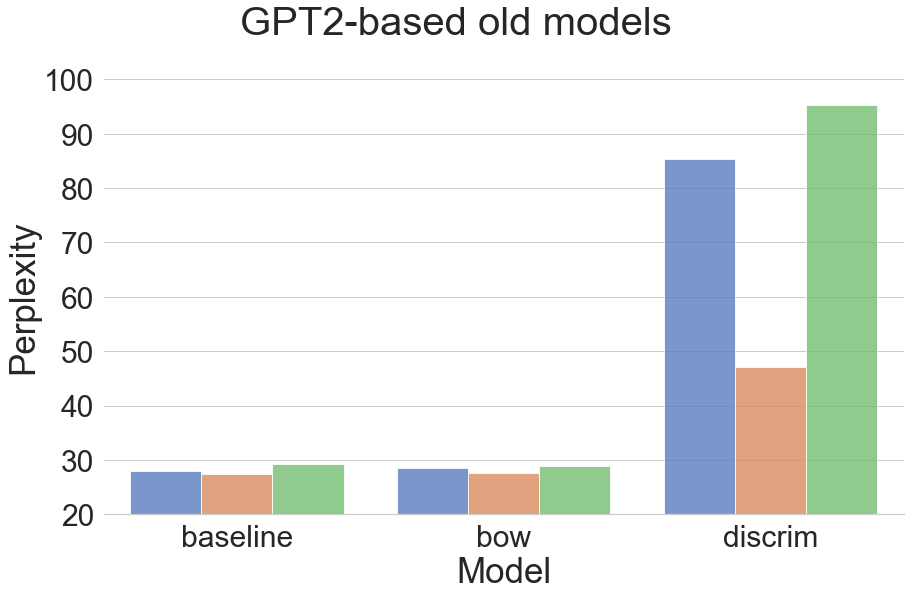

In [47]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=gpt2_old_df, kind="bar",
    x="model", y="ppl", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Perplexity", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, None))

g.set(ylim=(20, 100), yticks=[20, 30, 40, 50, 60, 70, 80, 90, 100])
g.set_yticklabels([20, 30, 40, 50, 60, 70, 80, 90, 100], size = TICK_SIZE + 10)

# g.legend.set_title("PPLM Model")
# # print(dir(g.legend))
# g.legend.set_bbox_to_anchor((1.15, 0.5))
# plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
# plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title
g._legend.remove()
g.fig.suptitle("GPT2-based old models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_ppl_gpt2_old_models.png")

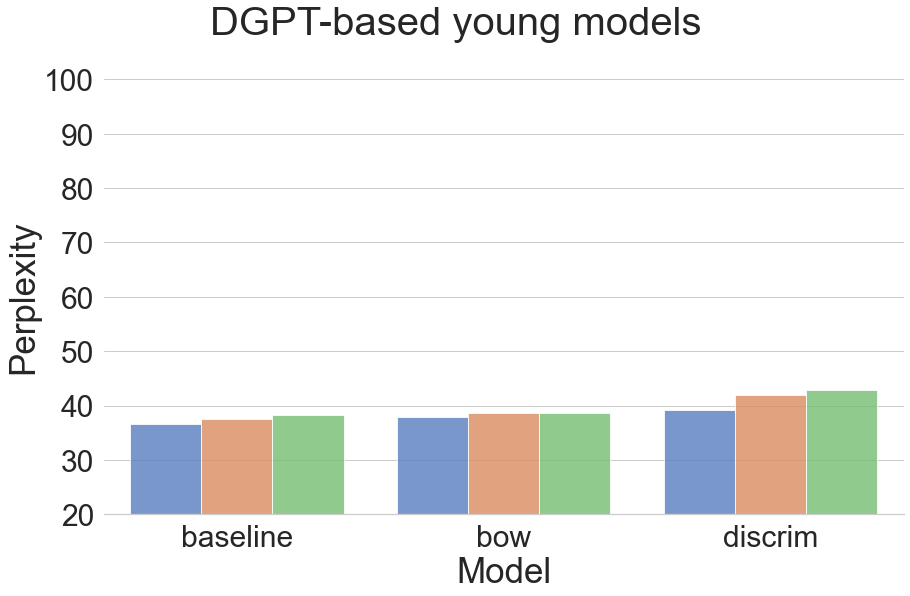

In [48]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=dgpt_young_df, kind="bar",
    x="model", y="ppl", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Perplexity", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, None))

g.set(ylim=(20, 100), yticks=[20, 30, 40, 50, 60, 70, 80, 90, 100])
g.set_yticklabels([20, 30, 40, 50, 60, 70, 80, 90, 100], size = TICK_SIZE + 10)

# g.legend.set_title("PPLM Model")
# # print(dir(g.legend))
# g.legend.set_bbox_to_anchor((1.15, 0.5))
# plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
# plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title
g._legend.remove()
g.fig.suptitle("DGPT-based young models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_ppl_dgpt_young_models.png")

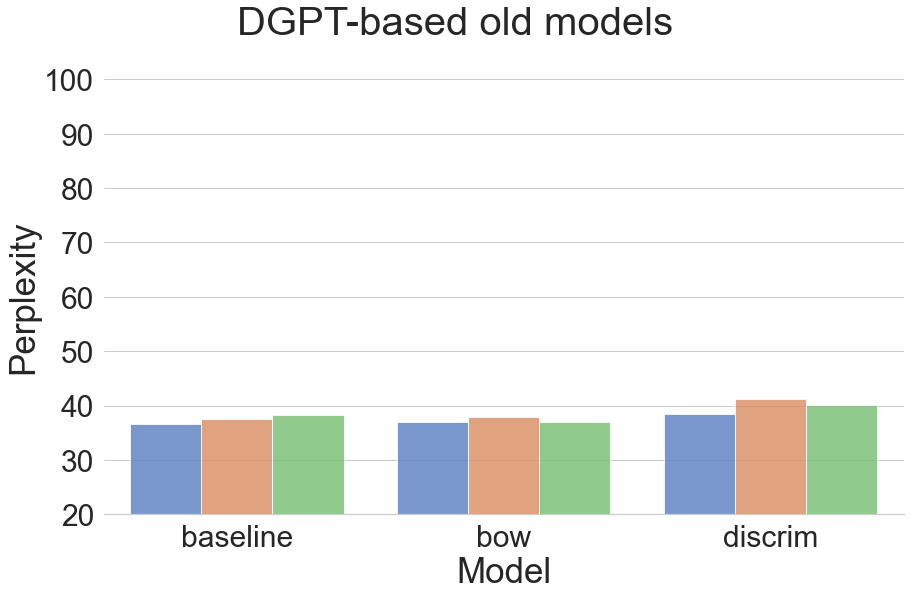

In [49]:
# Draw a nested barplot by prompt class and model
# plt.figure(figsize=PLOT_DIMS)
sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':PLOT_DIMS})
g = sns.catplot(
    data=dgpt_old_df, kind="bar",
    x="model", y="ppl", hue="prompt_class",
    ci="sd", alpha=.8, palette='muted', height=8.27, aspect=11.7/8.27
)
g.despine(left=True)
g.set_axis_labels("Model", "Perplexity", size=LABEL_SIZE + 10)
# g.set_yticklabels(size = TICK_SIZE + 10)
g.set_xticklabels(size = TICK_SIZE + 10)
# g.set(ylim=(0.0, None))

g.set(ylim=(20, 100), yticks=[20, 30, 40, 50, 60, 70, 80, 90, 100])
g.set_yticklabels([20, 30, 40, 50, 60, 70, 80, 90, 100], size = TICK_SIZE + 10)

# g.legend.set_title("PPLM Model")
# # print(dir(g.legend))
# g.legend.set_bbox_to_anchor((1.15, 0.5))
# plt.setp(g._legend.get_texts(), fontsize=LABEL_SIZE) # for legend text
# plt.setp(g._legend.get_title(), fontsize=TICK_SIZE) # for legend title
g._legend.remove()
g.fig.suptitle("DGPT-based old models", size=TITLE_SIZE + 10, x=0.5, y=1)
plt.tight_layout()
plt.savefig(f"../figures/prompt_class/catplot_prompt_class_ppl_dgpt_old_models.png")